In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold



In [2]:
df=pd.read_csv('HR_comma_sep.csv.txt')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


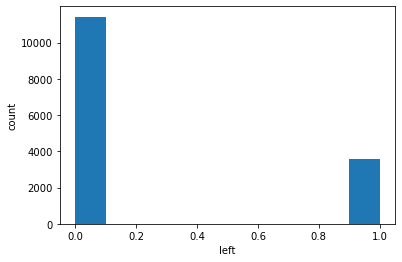

In [43]:

%matplotlib inline
plt.hist(df['left'])
plt.xlabel('left')
plt.ylabel('count')
plt.show()

In [36]:
df.shape

(14999, 10)

In [4]:
df.drop_duplicates()
df.shape

(14999, 10)

In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [30]:
df['sales'].unique().size

10

In [9]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [20]:
x=df.drop('left',axis=1)
y=df['left']

In [25]:
x.shape

(14999, 9)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=1)

In [31]:
trf1=ColumnTransformer([('encoder',OneHotEncoder(),[7,8])],remainder='passthrough')


In [32]:
pipe=Pipeline([('trf1',trf1),
                ('scaler',StandardScaler()),
                ('selector',VarianceThreshold()),
                ('model',LogisticRegression())])    

In [33]:
pipe.fit(x_train,y_train)


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  [7, 8])])),
                ('scaler', StandardScaler()), ('selector', VarianceThreshold()),
                ('model', LogisticRegression())])

In [34]:
print('Training score', pipe.score(x_train,y_train))
print('Training score', pipe.score(x_test,y_test))

Training score 0.7945721233037886
Training score 0.7973333333333333
